<a href="https://colab.research.google.com/github/SushiFou/ML-Business-Case-Project/blob/main/notebooks/DataEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center"><b> Machine Learning Business Case Project </b></div>
---
<div align="center">Authors : Maxime Lepeytre | Soumaya Sabry | Alexandre Zajac | Olivier Boivin | Yann Kervella


<center>
<img src="https://github.com/SushiFou/ML-Business-Case-Project/blob/main/cover_image_tech.jpg?raw=1" width="800px"/>
</center>
</div>

<div align="center"><font color='red' size='12'> DON'T FORGET TO COMMIT CHANGES ON GITHUB FOLKS ! Good luck ! <font></div>

## Context

Vous êtes consultant data scientist dans une grande entreprise de conseil
française. Votre client est une entreprise qui génère beaucoup de données
mais pour le moment aucun modèle de Machine Learning n'a été mis en
place pour les exploiter. Elle a donc naturellement fait appel à vous.

L’entreprise en question exploite plus de 3 000 magasins dans 7 pays
européens. Actuellement, les directeurs de magasin sont chargés d’estimer
leurs ventes quotidiennes jusqu'à six semaines à l'avance. Les ventes des
magasins sont influencées par de nombreux facteurs, notamment les
promotions, la concurrence, les vacances scolaires, la saisonnalité et la
localité. Avec des milliers de gestionnaires individuels prédisant les ventes
en fonction de leur situation particulière, la précision des résultats peut
être très variable.

Avec votre équipe de consultant data scientists, vous récupérez les
données disponibles et allez mener un projet complet pour les exploiter et
répondre à la problématique. Vous devez préparer et soutenir, pour le 21
janvier 2021, un rendu sous forme de slides qui tirera les conclusions de
votre travail, incluant une démonstration présentant les résultats du
modèle de Machine Learning de manière visuelle à destination des
utilisateur finaux. Vous aurez 12 minutes pour présenter votre travail à
votre donneur d’ordre client.

## Requirements


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Graphical settings
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          'axes.labelsize' : 15,
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          "axes.titlecolor": "w", 
          'figure.figsize': [20, 8], 
          'axes.prop_cycle': plt.cycler(color=color_list), 
          'figure.dpi' : 75, 
          'legend.fontsize': 10,
          'font.size': 15 
          }
plt.rcParams.update(params)

## Data Importation

### gdown if using colab

In [54]:
!gdown "https://drive.google.com/uc?id=1IHr_vKHZ0P0lUIAksJ9joRLUoUtZdDSY"

Downloading...
From: https://drive.google.com/uc?id=1IHr_vKHZ0P0lUIAksJ9joRLUoUtZdDSY
To: /content/store.csv
100% 45.0k/45.0k [00:00<00:00, 71.0MB/s]


In [55]:
!gdown "https://drive.google.com/uc?id=17ur-ILBNAZDgjpqgPU1XBLYSIXc5cn5d"

Downloading...
From: https://drive.google.com/uc?id=17ur-ILBNAZDgjpqgPU1XBLYSIXc5cn5d
To: /content/test.csv
100% 1.43M/1.43M [00:00<00:00, 90.6MB/s]


In [56]:
!gdown "https://drive.google.com/uc?id=1kx5sSTcRj4aVS8KZgSCcdo9-5i1axh5n"

Downloading...
From: https://drive.google.com/uc?id=1kx5sSTcRj4aVS8KZgSCcdo9-5i1axh5n
To: /content/train.csv
38.1MB [00:00, 178MB/s] 


In [57]:
!gdown "https://drive.google.com/uc?id=10p7JyO2DNkWbMRZoMNVPmipy1msZpBEV"

Downloading...
From: https://drive.google.com/uc?id=10p7JyO2DNkWbMRZoMNVPmipy1msZpBEV
To: /content/variables.txt
100% 1.58k/1.58k [00:00<00:00, 7.85MB/s]


## Data Exploration

In [58]:
path = ''

In [59]:
f = open(path+"variables.txt", "r")
print(f.read())

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set
Store - a unique Id for each store
Sales - the turnover for any given day
Customers - the number of customers on a given day
Open - an indicator for whether the store was open: 0 = closed, 1 = open
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of t

In [60]:
store_data = pd.read_csv(path+'store.csv')
print(f'Dataframe shape : rows = {store_data.shape[0]}, columns = {store_data.shape[1]}')
store_data.head()

Dataframe shape : rows = 1115, columns = 10


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [61]:
train_data = pd.read_csv(path+'train.csv', low_memory = False)
print(f'Dataframe shape : rows = {train_data.shape[0]}, columns = {train_data.shape[1]}')
train_data.head()

Dataframe shape : rows = 1017209, columns = 9


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Check Nan Values

In [62]:
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Only 3 Nan values in competition distance 

A lot of nan due to no competition registered for some tuples

In [63]:
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [64]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].mean(), inplace = True)

In [65]:
store_data.fillna(-1, inplace=True)

In [66]:
store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Check Outliers

In [67]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.00000
mean,558.00000,5404.901079,4.613453,1370.621525,0.512108,11.595516,1029.75157
std,322.01708,7652.849306,4.659540,935.933356,0.500078,15.925223,1006.53886
min,1.00000,20.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.00000
25%,279.50000,720.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.00000
50%,558.00000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.00000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.00000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.00000


Let's try to process the CompetitionDistance Outliers

In [68]:
from scipy import stats
store_data['CD_zscore'] = np.abs(stats.zscore(store_data['CompetitionDistance'].to_numpy()))
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CD_zscore
0,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,0.540551
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.632061
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1.140623
3,4,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,-1,0.625525
4,5,a,a,29910.0,4.0,2015.0,0,-1.0,-1.0,-1,3.203525


In [69]:
store_data_cleaned = store_data[store_data['CD_zscore'] < 3] ##pq ?? 
store_data_cleaned.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CD_zscore
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,559.150046,4725.402290,4.617566,1363.264410,0.522415,11.849039,1050.498628,0.608184
std,322.261812,5825.426321,4.683200,938.761871,0.499726,15.983167,1005.830924,0.466511
min,1.000000,20.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,279.000000,700.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.349713
50%,560.000000,2280.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000,0.553650
75%,839.000000,6360.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,0.673895
max,1115.000000,27650.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,2.908078


In [70]:
store_data = store_data_cleaned.drop(columns='CD_zscore')
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,-1
5,6,a,a,310.0,12.0,2013.0,0,-1.0,-1.0,-1


In [71]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


## DateTime col

In [72]:
import datetime
store_data_WithDate = store_data_cleaned.copy()
store_data_WithDate['CompetitionOpenSinceDay'] = 1
#store_data_WithDate['CompetitionSince'] = 
#datetime.datetime(year=store_data_WithDate['CompetitionOpenSinceYear'],month=store_data_WithDate['CompetitionOpenSinceMonth'], day = 1)
store_data_WithDate['CompetitionSince'] = pd.to_datetime(dict(year=store_data_WithDate['CompetitionOpenSinceYear'], month=store_data_WithDate['CompetitionOpenSinceMonth'], day=store_data_WithDate['CompetitionOpenSinceDay']), errors='coerce')
store_data_WithDate.drop(['CompetitionOpenSinceYear','CompetitionOpenSinceMonth', 'CompetitionOpenSinceDay'], axis = 1, inplace = True, ) 

In [73]:
store_data_WithDate

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CD_zscore,CompetitionSince
0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01
1,2,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.632061,2007-11-01
2,3,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1.140623,2006-12-01
3,4,c,c,620.0,0,-1.0,-1.0,-1,0.625525,2009-09-01
5,6,a,a,310.0,0,-1.0,-1.0,-1,0.666051,2013-12-01
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0.458192,2014-06-01
1111,1112,c,c,1880.0,0,-1.0,-1.0,-1,0.460807,2006-04-01
1112,1113,a,c,9260.0,0,-1.0,-1.0,-1,0.503973,NaT
1113,1114,a,c,870.0,0,-1.0,-1.0,-1,0.592843,NaT


In [74]:
store_data_WithDate['Promo2Since'] = pd.to_datetime(store_data_WithDate.Promo2SinceYear.astype('int32').astype(str)+'-W' + store_data_WithDate.Promo2SinceWeek.astype('int32').astype(str) + '-1',format='%Y-W%W-%w',errors='coerce' )

In [75]:
store_data_WithDate

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CD_zscore,CompetitionSince,Promo2Since
0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT
1,2,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.632061,2007-11-01,2010-03-29
2,3,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1.140623,2006-12-01,2011-04-04
3,4,c,c,620.0,0,-1.0,-1.0,-1,0.625525,2009-09-01,NaT
5,6,a,a,310.0,0,-1.0,-1.0,-1,0.666051,2013-12-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0.458192,2014-06-01,2013-08-05
1111,1112,c,c,1880.0,0,-1.0,-1.0,-1,0.460807,2006-04-01,NaT
1112,1113,a,c,9260.0,0,-1.0,-1.0,-1,0.503973,NaT,NaT
1113,1114,a,c,870.0,0,-1.0,-1.0,-1,0.592843,NaT,NaT


## VIZ

In [76]:
from time import strptime
import datetime

def plot_CompPromo(data_store, data_train , StoreNB):
    data_store_i = data_store[data_store["Store"]==StoreNB]
    data_train_i = data_train[data_train["Store"]==StoreNB]
    data_train_i = data_train_i[data_train_i['Open'] == 1].sort_values('Date', ascending=True).reset_index(drop=False)
    data_train_i['Date'] = pd.to_datetime(data_train_i['Date'] )
    plt.plot(data_train_i['Date'],data_train_i['Sales'])
    if str(data_store_i['Promo2Since'].values[0])  == 'NaT':
        print('Pas de Promo2')
    else : 
        if data_store_i['Promo2Since'].values[0] < min(data_train_i['Date']) :
            min_date = min(data_train_i['Date'])
        else : 
            min_date =  pd.to_datetime(data_store_i['Promo2Since'].values[0])
        max_date = max(data_train_i['Date'])
        for y in range(min_date.year , max_date.year + 1):
            for m in data_store_i['PromoInterval'].values[0].split(','):
                month_interval = strptime(m[:3],'%b').tm_mon
                start_date = datetime.datetime(y, month_interval , 1) 
                end_date = datetime.datetime(y, month_interval+1, 1)
                if start_date < min_date:
                    start_date = min_date
                if end_date > max_date:
                    end_date = max_date
                plt.axvspan(start_date,end_date, color='red', alpha=0.5)

    if str(data_store_i['CompetitionSince'].values[0])  == 'NaT':
        print('Pas de Competition')
    else : 
        if data_store_i['CompetitionSince'].values[0] < min(data_train_i['Date']) :
            plt.axvline(x=min(data_train_i['Date']), c = 'red')
        else :
            plt.axvline(x= data_store_i['CompetitionSince'].values[0], c = 'red')
    
    plt.show()

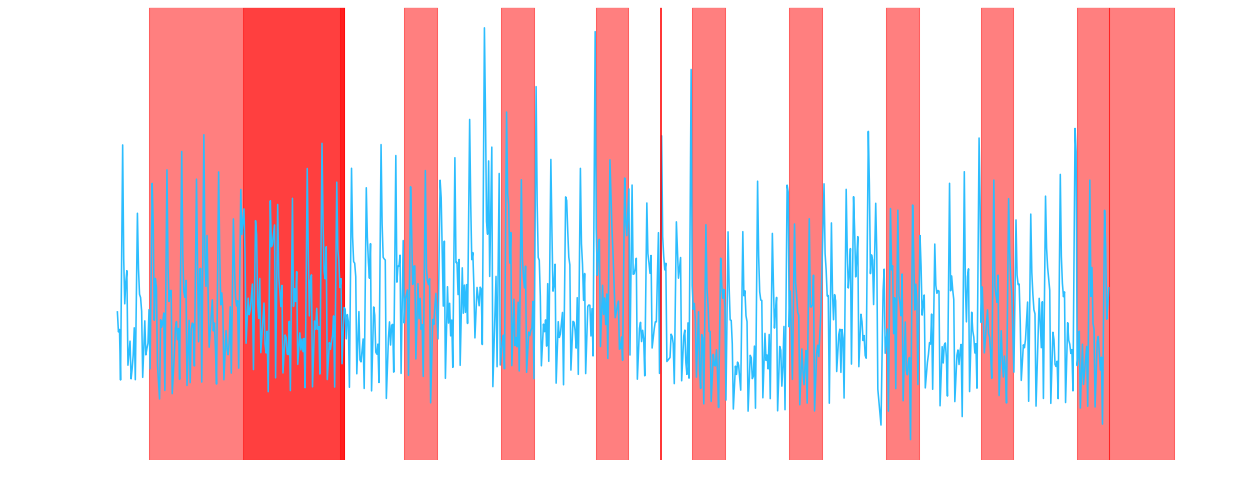

In [77]:
plot_CompPromo(store_data_WithDate,train_data,1111)

## Merge avec train

In [78]:
train_data = train_data.merge(store_data_WithDate, on=['Store'])

In [79]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CD_zscore,CompetitionSince,Promo2Since
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT


In [80]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['CompetitionSince'] = pd.to_datetime(train_data['CompetitionSince'])
train_data['Promo2Since'] = pd.to_datetime(train_data["Promo2Since"])

In [81]:
train_data['CompetitionSince(Days)'] = (train_data['Date'] - train_data['CompetitionSince']).apply(lambda x: x.days)
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CD_zscore,CompetitionSince,Promo2Since,CompetitionSince(Days)
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT,2524.0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT,2523.0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT,2522.0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT,2521.0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT,2520.0


In [82]:
train_data['PromoSince(Days)'] = (train_data['Date'] - train_data['Promo2Since']).apply(lambda x: x.days)

In [83]:
train_data.fillna(-1, inplace=True)

In [84]:
train_data.isna().sum()

Store                     0
DayOfWeek                 0
Date                      0
Sales                     0
Customers                 0
Open                      0
Promo                     0
StateHoliday              0
SchoolHoliday             0
StoreType                 0
Assortment                0
CompetitionDistance       0
Promo2                    0
Promo2SinceWeek           0
Promo2SinceYear           0
PromoInterval             0
CD_zscore                 0
CompetitionSince          0
Promo2Since               0
CompetitionSince(Days)    0
PromoSince(Days)          0
dtype: int64

In [86]:
train_data.drop(columns=['CD_zscore', 'CompetitionSince', 'Promo2Since'], inplace=True)
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionSince(Days),PromoSince(Days)
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,2524.0,-1.0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,2523.0,-1.0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,2522.0,-1.0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,2521.0,-1.0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,0,-1.0,-1.0,-1,2520.0,-1.0


In [87]:
train_data.to_csv('train_enhanced.csv')

In [93]:
test_data = pd.read_csv('test.csv')
test_data = test_data.merge(store_data_WithDate, on=['Store'])
test_data.drop(columns=['Id'], inplace=True)
test_data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CD_zscore,CompetitionSince,Promo2Since
0,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT
1,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT
2,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT
3,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT
4,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2008-09-01,NaT


In [94]:
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data['Promo2Since'] = pd.to_datetime(test_data['Promo2Since'])
test_data['CompetitionSince'] = pd.to_datetime(test_data['CompetitionSince'])

In [96]:
test_data['CompetitionSince(Days)'] = (test_data['Date'] - test_data['CompetitionSince']).apply(lambda x: x.days)
test_data['PromoSince(Days)'] = (test_data['Date'] - test_data['Promo2Since']).apply(lambda x: x.days)

In [99]:
test_data.drop(columns=['CompetitionSince', 'Promo2Since'], inplace=True)
test_data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CD_zscore,CompetitionSince(Days),PromoSince(Days)
0,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2572.0,NaN
1,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2571.0,NaN
2,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2570.0,NaN
3,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2569.0,NaN
4,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,0,-1.0,-1.0,-1,0.540551,2568.0,NaN


In [100]:
test_data.to_csv('test_enhanced.csv')